In [40]:
import pandas as pd
df = pd.read_csv("cab.csv")

In [41]:
df.tail

<bound method NDFrame.tail of     miles  temp  rain  ncabs  price
0       1    30     0     10     20
1       1    38     0      5     40
2       1    25     0      1     50
3       1    20     1     10     50
4       1    15     1      4     80
5       1    10     1      2    200
6       2    30     0     10     30
7       2    38     0      5     50
8       2    25     0      1     90
9       2    20     1     10     90
10      2    15     1      4    120
11      2    10     1      2    250
12      3    30     0     10     50
13      3    38     0      5     80
14      3    25     0      1     96
15      3    20     1     10    110
16      3    15     1      4    120
17      3    10     1      2    300
18      4    30     0     10     90
19      4    38     0      5    140
20      4    25     0      1    160
21      4    20     1     10    250
22      4    15     1      4    170
23      4    10     1      2    400
24      5    30     0     10    140
25      5    38     0      5    17

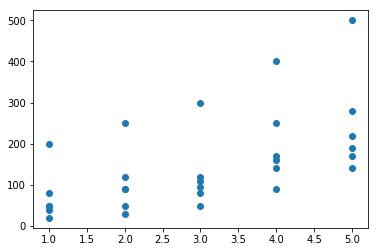

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df["miles"],y = df["price"])
plt.show()

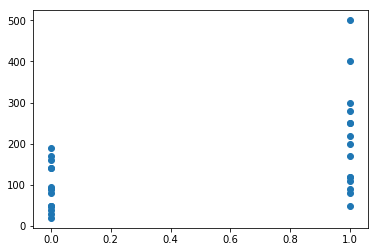

In [43]:
plt.scatter(x=df["rain"],y = df["price"])
plt.show()

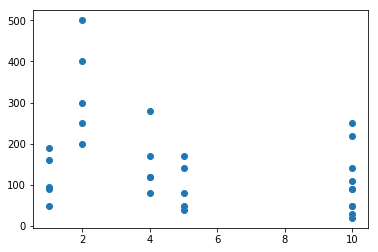

In [44]:
plt.scatter(x=df["ncabs"],y = df["price"])
plt.show()

In [45]:
df.corr()

,miles,temp,rain,ncabs,price
miles,1.000000,0.000000,0.000000,0.000000,0.577134
temp,0.000000,1.000000,-0.859338,0.298096,-0.619816
rain,0.000000,-0.859338,1.000000,0.000000,0.527199
ncabs,0.000000,0.298096,0.000000,1.000000,-0.369060
price,0.577134,-0.619816,0.527199,-0.369060,1.000000


In [46]:
X = df.drop("price",axis=1)
X

,miles,temp,rain,ncabs
0,1,30,0,10
1,1,38,0,5
2,1,25,0,1
3,1,20,1,10
4,1,15,1,4
5,1,10,1,2
6,2,30,0,10
7,2,38,0,5
8,2,25,0,1
9,2,20,1,10


In [47]:
y = df["price"]
y

0      20
1      40
2      50
3      50
4      80
5     200
6      30
7      50
8      90
9      90
10    120
11    250
12     50
13     80
14     96
15    110
16    120
17    300
18     90
19    140
20    160
21    250
22    170
23    400
24    140
25    170
26    190
27    220
28    280
29    500
Name: price, dtype: int64

In [48]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (30, 4)
Variable set size: (30,)


In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [50]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (27, 4)
Test feature set size: (3, 4)
Training variable set size: (27,)
Test variable set size: (3,)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [53]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 97.77677644070937


In [55]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [40.7062413  -2.90534163 55.13215881 -7.10216493]


In [56]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
miles,40.706241
temp,-2.905342
rain,55.132159
ncabs,-7.102165


In [57]:
lm.predict([[4,10,1,1]])

array([279.57831921])

In [58]:
y_test_prlm.predict(X_test)

array([ 33.27545242, 313.18239558, 150.35743038])

In [ ]:
metrics.mean_squared_error()